In [20]:
from Utilities.meanShift import *
from Utilities.RGB_to_LUV import *
from Utilities.BGR_to_LUV import *
from Utilities.threshold import *
from Utilities.Kmeans import *
from Utilities.region_growing import *
from Utilities.Agg import *
import matplotlib.pyplot as plt

## Segmentation

### 1- RGB to LUV

#### Original image

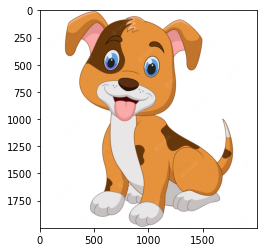

In [12]:
img1 = cv2.imread("./images/rgb.webp")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.figure('Original Image')
plt.imshow(img1)

#### Converted

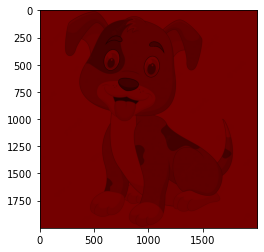

In [14]:
img1 = cv2.imread("./images/rgb.webp")
image=np.uint8(img1)
result = RGB_To_LUV(image)
# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(result)

### 2- K-Means

<h3>Original Image</h3>

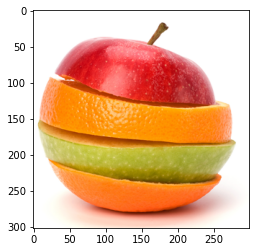

In [18]:
image = plt.imread('images/fruit.png')
plt.figure('Original Image')
plt.imshow(image)

#### Segmented Image

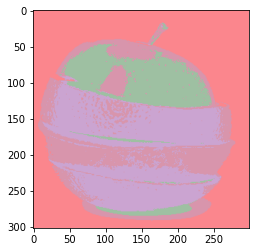

In [21]:
image=cv2.imread('images/fruit.png')
img= BGR_To_LUV(image)
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
np.seterr(invalid='ignore')
myModel = KMeans(K=4, max_iterations=100)
predictions = myModel.predict(pixel_values)
centers = np.uint8(myModel.modelCentroids())
predictions = predictions.astype(int)
labels = predictions.flatten()
segmented_image = centers[labels]
segmented_Kmean = segmented_image.reshape(img.shape)
plt.figure("Segmented Image")
plt.imshow(segmented_Kmean)

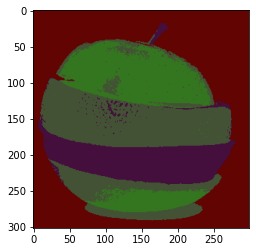

In [63]:
image = plt.imread('images/fruit.png')
img= RGB_To_LUV(image)
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
np.seterr(invalid='ignore')
myModel = KMeans(K=4, max_iterations=100)
predictions = myModel.predict(pixel_values)
centers = np.uint8(myModel.modelCentroids())
predictions = predictions.astype(int)
labels = predictions.flatten()
segmented_image = centers[labels]
segmented_Kmean = segmented_image.reshape(img.shape)
plt.figure("Segmented Image")
plt.imshow(segmented_Kmean)

### 3- Region Growing

#### Segmented Image

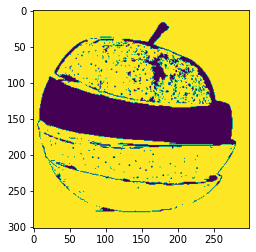

In [61]:
image=cv2.imread('images/fruit.png',0)
seeds = [[25, 35],[88, 200],[30, 250]]
segmented_RegGrow = fit(image,seeds, 6)
plt.figure("Segmented Image")
plt.imshow(segmented_RegGrow)

### 4- Agglomoritive

#### Note: Due to very long prossecing time we used another small image

#### Original Image

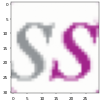

In [114]:
image=plt.imread('images/AGG_img.png')
plt.figure("Segmented Image")
plt.rc("figure", dpi=30)
plt.imshow(image)

#### Segmented Image

(31, 30, 3)
Execution time of Agglomerative method86.80606985092163 sec


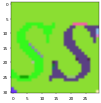

In [115]:
image=cv2.imread('images/AGG_img.png')
print(image.shape)
# image = cv2.resize(image,(50,50))
img = np.array(image)
points,dindogram = segment(img,15)
segmented_agglo=draw(points,dindogram,image)
plt.figure("Segmented Image")
plt.rc("figure", dpi=30)
plt.imshow(segmented_agglo)

### 5- Mean Shift

#### Original Image

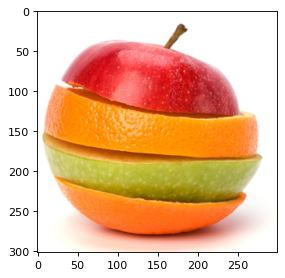

In [124]:
image = plt.imread('images/fruit.png')
plt.figure('Original Image')
plt.imshow(image)

<h3>Segmented Image</h3>

Execution time is3.9145026206970215 sec
Number of clusters =  27


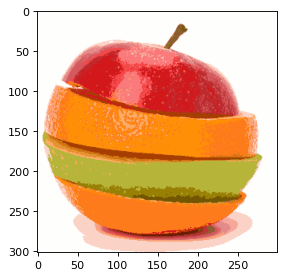

In [123]:
image = plt.imread('images/fruit.png')
Bandwidth = 0.1*np.max(image)
segmented_image, num_clusters = meanShift(image, Bandwidth, 3)
plt.figure("Segmented Image")
plt.imshow(segmented_image)
print("Number of clusters = ",num_clusters)

## Thresholding

### Original Image

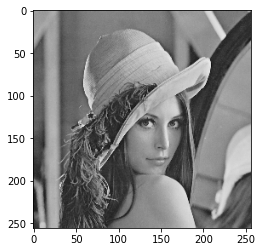

In [28]:
image = plt.imread('images/threshold.png')
plt.figure('Original Image')
plt.imshow(image)

### 1-OptimalThreshold

#### A. Global Threshold

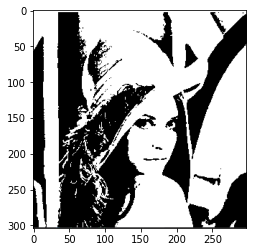

In [29]:
image = plt.imread('images/threshold.png')
plt.figure('After applying global optimal threshold Image')
result=Global_threshold(image,"Optimal")
image = plt.imread('Output/globalOptimal_out.png')
plt.imshow(image)

#### B. Local Threshold

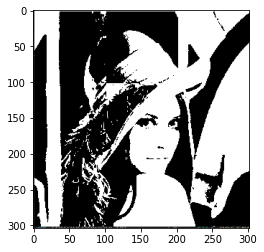

In [30]:
image = plt.imread('images/threshold.png')
plt.figure('After applying local optimal threshold Image')
image = plt.imread('Output/localOptimal_out.png')
plt.imshow(image)

### 2.Otsu Threshold

#### A. Global Threshold

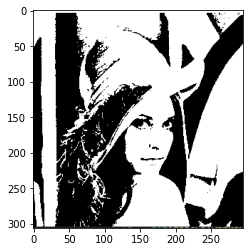

In [31]:
image = plt.imread('images/threshold.png')
plt.figure('After applying global otsu threshold Image')
result=Global_threshold(image,"Otsu")
image = plt.imread('Output/globalOtsu_out.png')
plt.imshow(image)

#### B. Local Threshold

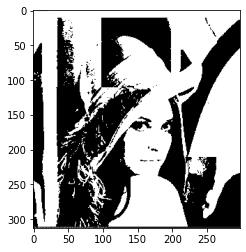

In [32]:
image = plt.imread('images/threshold.png')
plt.figure('After applying local otsu threshold Image')
image = plt.imread('Output/localOtsu_out.png')
plt.imshow(image)

### 3.Spectral Threshold

#### A. Global Threshold

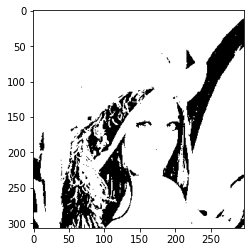

In [33]:
image = plt.imread('images/threshold.png')
plt.figure('After applying global spectral threshold Image')
result=Global_threshold(image,"spect")
image = plt.imread('Output/globalSpectral_out.png')
plt.imshow(image)

#### B. Local Threshold

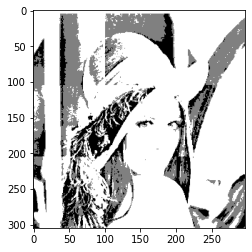

In [34]:
image = plt.imread('images/threshold.png')
plt.figure('After applying local spectral threshold Image')
result=Local_threshold(image,100,"spect")
image = plt.imread('Output/localSpectral_out.png')
plt.imshow(image)